# ICO Fraud detection - First Exploratory Data Analysis (EDA)
### Objective:
The goal of this notebook is to explore the ICO data through a series of aggregations and visualizations.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)

## 1. Reading the data files

In [3]:
scam_folder_path = '../data_and_models/lista_ico/ico_scam/tokens/'
scam_file_list = os.listdir(scam_folder_path)

success_folder_path = '../data_and_models/lista_ico/ico_success/tokens/'
success_file_list = os.listdir(success_folder_path)


In [4]:
scam_file_list[:10]


['CREDITS_T_COMPLETO.csv',
 'MDTOKENS_T_COMPLETO.csv',
 'DAPSCOIN_T_COMPLETO.csv',
 'ENVION_T_COMPLETO.csv',
 'FREECOIN_T_COMPLETO.csv',
 'RETENGO_T_COMPLETO.csv',
 'ZPAY_T.csv',
 'CARNOMIC_T.csv',
 'CRYPTORIYA_T.csv',
 'RIGHTMESH_T_COMPLETO.csv']

In [5]:
success_file_list[:10]

['AMPLEFORTH_T_COMPLETO.csv',
 'EGRETIA_T_COMPLETO.csv',
 'LOOM_T_COMPLETO.csv',
 'DUSKNETWORK_T_COMPLETO.csv',
 'TIERION_T_COMPLETO.csv',
 'BAND_T_COMPLETO.csv',
 'METRONOME_T_COMPLETO.csv',
 'GIFTO_T_COMPLETO.csv',
 'POLYMATH_T_COMPLETO.csv',
 'EVEREX_T_COMPLETO.csv']

## 2. Loading one file

In [15]:
df_test = pd.read_csv(f'{scam_folder_path}/{scam_file_list[0]}')
df_test.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash
0,0x46b9ad944d1059450da1163511069c718f699d31,0x415e3a458ce27b1dfa4ab1c68aab724b60399527,0x196eeecf1a247ed7cadfb39a3125a321f8642aad,33000000,0x257d11a4f90b2fad7d02213e24fc78cae91593404440...,198,2020-07-01 13:30:06 UTC,10373791,0xeb3286905a8cc9763f17191192fa670ba6ef34cf901a...
1,0x46b9ad944d1059450da1163511069c718f699d31,0x1e695f0055c9c62b9ba43776b5f3fcb2744046a4,0x7dd958a5bc6c3f30444deefffcf2abb80eec5580,57609291026,0x08b80fdd9fa23e64e6c4ebcf6832bd1d92be8dd58ae9...,132,2020-07-01 14:52:16 UTC,10374168,0x183c1fc8fdd5b6b01cb8bdc6a6ee3721da8cb566f762...
2,0x46b9ad944d1059450da1163511069c718f699d31,0xedddf1f3f1219543aab14ccb9062862444d41e0d,0xad7a89cad799b48828b5cf32e55c6e72278ef8f9,0,0x8ab78f751b2da13fcf8bbec857accc71bd12ffcc3e29...,126,2020-04-04 11:51:51 UTC,9805317,0x3f9019b5164cceb3519a043100e4be2e5d8a832f7d13...
3,0x46b9ad944d1059450da1163511069c718f699d31,0x90c2517b389634f205083d4cb0aa5911df5d751f,0x689c56aef474df92d44a1b70850f808488f9769c,20000000000,0x4373e52710fadd36614f9018d90c929fc987e60dbc19...,77,2018-12-15 07:56:39 UTC,6889989,0x18b689903605a73e2169fc36dc72a31dd297436cbc8a...
4,0x46b9ad944d1059450da1163511069c718f699d31,0x236343006a2101cb4a78cd55b8cdf12b0f203a7a,0x689c56aef474df92d44a1b70850f808488f9769c,207106439,0x853e7a8525a2fd20e45f1f6caa24c106992089db3e29...,79,2018-12-15 11:12:22 UTC,6890761,0x54bad4154f451d24b7d4b7cc6448e4a385ee8d304880...


In [17]:
df_test.shape[0]

157849

## 3. Loading Multiple files

In [20]:
list_multiple_files_scam = []

### 3.1. Appending the DataFrame instances to list

In [56]:
%%time
list_multiple_files_scam = [pd.read_csv(f'{scam_folder_path}/{file}') for file in scam_file_list]
list_multiple_files_success = [pd.read_csv(f'{success_folder_path}/{file}') for file in success_file_list]

CPU times: user 31 s, sys: 2.27 s, total: 33.3 s
Wall time: 33.6 s


In [60]:
len(list_multiple_files_scam)

67

In [61]:
len(success_file_list)

36

In [ ]:
### 3.2. Create DataFrame with features for ICOs

In [44]:
list_len_scam_dfs = [[scam_file_list[n].strip('.csv'), list_multiple_files_scam[n].shape[0], 1, list_multiple_files_scam[n].value] for n in range(len(list_multiple_files_scam))]
list_len_scam_dfs.extend([[success_file_list[n].strip('.csv'), list_multiple_files_success[n].shape[0], 0] for n in range(len(list_multiple_files_success))])

In [46]:
len(list_len_scam_dfs)

103

In [52]:
df_agg = pd.DataFrame(list_len_scam_dfs, columns=['ico','size','fraud'])
df_agg.head()

,ico,size,fraud
0,CREDITS_T_COMPLETO,157849,1
1,MDTOKENS_T_COMPLETO,9799,1
2,DAPSCOIN_T_COMPLETO,67603,1
3,ENVION_T_COMPLETO,70316,1
4,FREECOIN_T_COMPLETO,102676,1


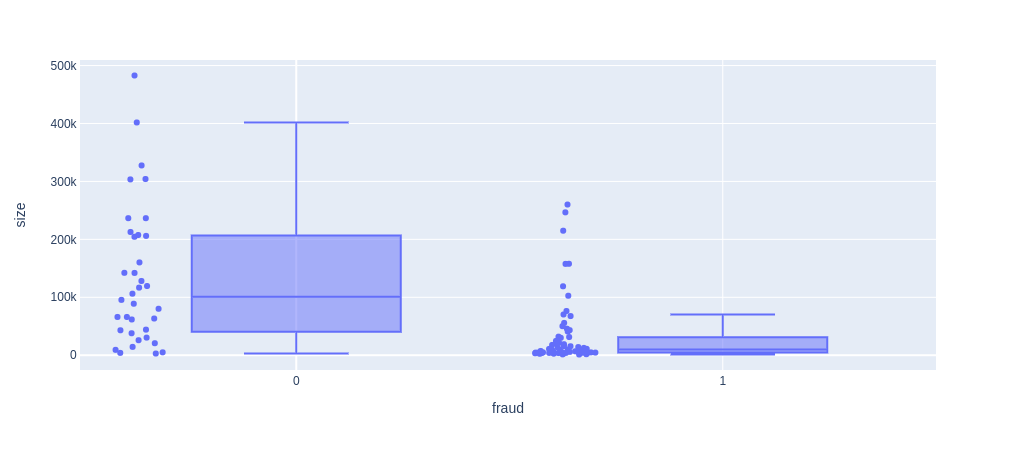

In [53]:
import plotly.express as px
#df = px.data.tips()
fig = px.box(df_agg, x="fraud", y="size", points="all")
fig.show()